# In this noteboook, I imported breast cancer dataset from kaggle (https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset) 
#Logistic regression was used to predict diagnosis from various column data. In addition,data was visualized to show trend for each features. 

# M stands for a malignant (cancerous) tumor and B stands for benign(non-cancerous) tumors. 



In [ ]:
from google.colab import files
files_uploaded = files.upload()

Saving Breast Cancer Dataset.csv to Breast Cancer Dataset.csv


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import sklearn

In [ ]:
df = pd.read_csv(r'Breast Cancer Dataset.csv')

In [ ]:
df.set_index('id')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


# <font color='green'> Processing and Understanding the Data</font>

In [ ]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
null = df.isnull().any() #checking if any of the columns contains NAs
print(null)

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

No need to clean data since there is no null values in this dataset

# **Exploratory Data Analysis**

 <font color='green'>1. Diagnosis Proportions in the Data</font>

In [ ]:
df.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


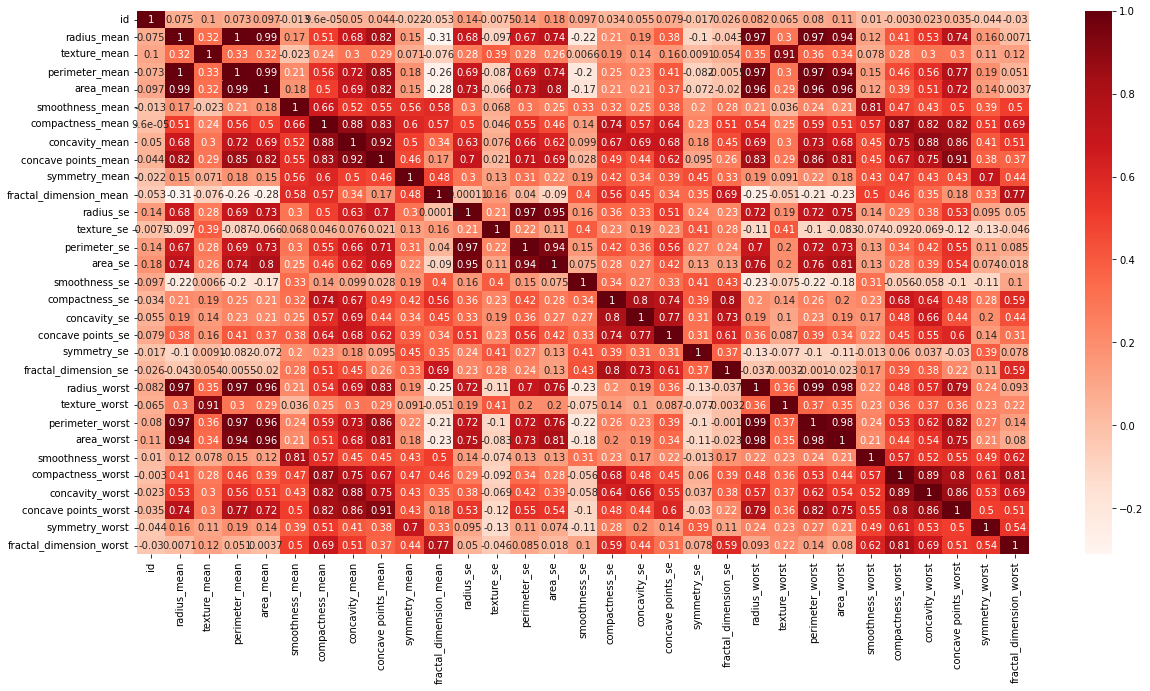

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='Reds')

[Text(0.5, 1.0, 'Diagnosis')]

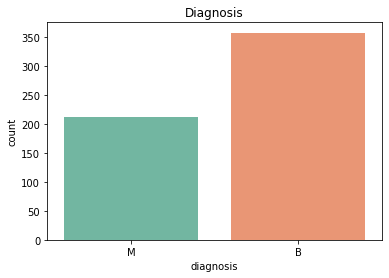

In [ ]:
sns.countplot(data=df, x='diagnosis',palette='Set2').set(title='Diagnosis')

There are more begnign cases than malignant cases

In [ ]:
#sns.boxplot(data=df, x="diagnosis", y="radius_mean", palette='deep').set(title='Radius mean vs Diagnosis')


 <font color='green'> 2. Visualizing How Mean Values Affect diagnosis</font> 

In [ ]:
def plot1(column_name):
  sns.histplot(data=df,x=column_name, hue='diagnosis', palette='deep', element='step').set(title= column_name+' vs Diagnosis')

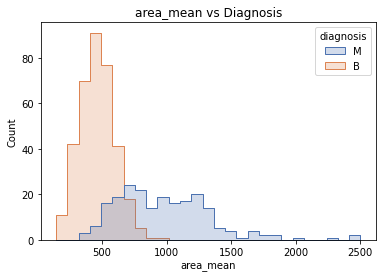

In [ ]:
plot1('area_mean')

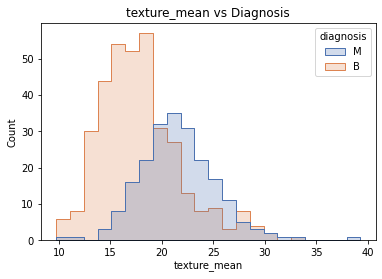

In [ ]:
plot1('texture_mean')

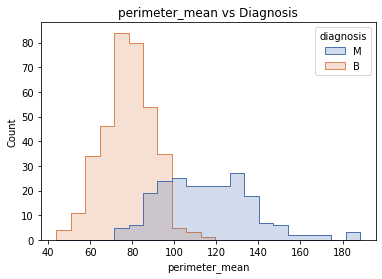

In [ ]:
plot1('perimeter_mean')

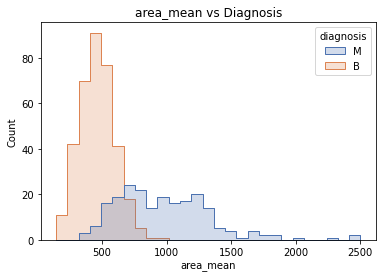

In [ ]:
plot1('area_mean')

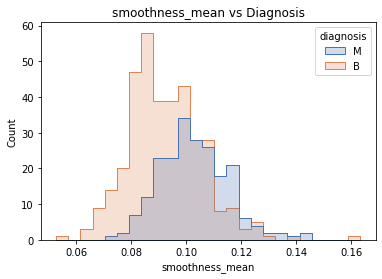

In [ ]:
plot1('smoothness_mean')

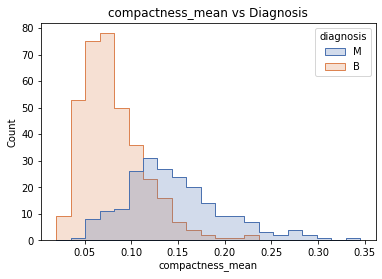

In [ ]:
plot1('compactness_mean')

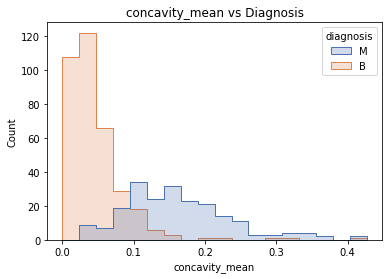

In [ ]:
plot1('concavity_mean')

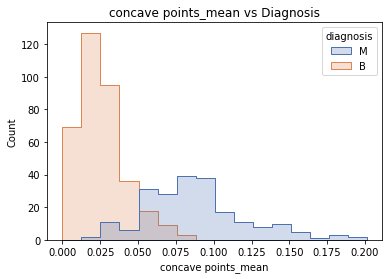

In [ ]:
plot1('concave points_mean')

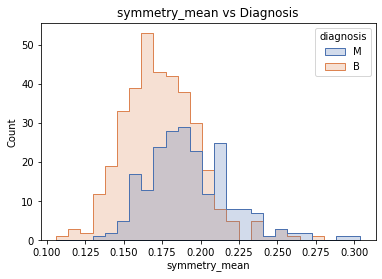

In [ ]:
plot1('symmetry_mean')

Higher the mean values are for the each column, the more likey that the cells are malignant. 

Here, I want to predict the dianosis besed on the given variables, the outcome is either M or B (descrete). Thus, I choose logistic regression


# **Train and Test Data**
Predicting diagnosis 

In [ ]:
df=df.drop(['id'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X= df.drop("diagnosis", axis=1) #all column expect dianosis
y=df['diagnosis'] #independent 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21) #30% for testing 70% for train

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
398,11.06,14.83,70.31,378.2,0.07741,0.04768,0.027120,0.007246,0.1535,0.06214,...,12.68,20.35,80.79,496.7,0.1120,0.1879,0.20790,0.05556,0.2590,0.09158
141,16.11,18.05,105.10,813.0,0.09721,0.11370,0.094470,0.059430,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158
134,18.45,21.91,120.20,1075.0,0.09430,0.09709,0.115300,0.068470,0.1692,0.05727,...,22.52,31.39,145.60,1590.0,0.1465,0.2275,0.39650,0.13790,0.3109,0.07610
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.24920,0.09186,0.2626,0.07048
554,12.88,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.023430,0.1566,0.05708,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.24390,0.06493,0.2372,0.07242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,11.16,21.41,70.95,380.3,0.10180,0.05978,0.008955,0.010760,0.1615,0.06144,...,12.36,28.92,79.26,458.0,0.1282,0.1108,0.03582,0.04306,0.2976,0.07123
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.035120,0.026230,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
368,21.71,17.25,140.90,1546.0,0.09384,0.08562,0.116800,0.084650,0.1717,0.05054,...,30.75,26.44,199.50,3143.0,0.1363,0.1628,0.28610,0.18200,0.2510,0.06494
48,12.05,14.63,78.04,449.3,0.10310,0.09092,0.065920,0.027490,0.1675,0.06043,...,13.76,20.70,89.88,582.6,0.1494,0.2156,0.30500,0.06548,0.2747,0.08301


In [ ]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
550,10.86,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.000000,0.1661,0.05948,...,11.66,24.77,74.08,412.3,0.1001,0.07348,0.000000,0.00000,0.2458,0.06592
147,14.95,18.77,97.84,689.5,0.08138,0.11670,0.090500,0.035620,0.1744,0.06493,...,16.25,25.47,107.10,809.7,0.0997,0.25210,0.250000,0.08405,0.2852,0.09218
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.20500,0.400000,0.16250,0.2364,0.07678
77,18.05,16.15,120.20,1006.0,0.10650,0.21460,0.168400,0.108000,0.2152,0.06673,...,22.39,18.91,150.10,1610.0,0.1478,0.56340,0.378600,0.21020,0.3751,0.11080
339,23.51,24.27,155.10,1747.0,0.10690,0.12830,0.230800,0.141000,0.1797,0.05506,...,30.67,30.73,202.40,2906.0,0.1515,0.26780,0.481900,0.20890,0.2593,0.07738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,14.11,12.88,90.03,616.5,0.09309,0.05306,0.017650,0.027330,0.1373,0.05700,...,15.53,18.00,98.40,749.9,0.1281,0.11090,0.053070,0.05890,0.2100,0.07083
469,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,0.1957,0.07255,...,13.36,25.40,88.14,528.1,0.1780,0.28780,0.318600,0.14160,0.2660,0.09270
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.05800,1.105000,0.22100,0.4366,0.20750
333,11.25,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,0.1773,0.06081,...,12.76,22.06,82.08,492.7,0.1166,0.09794,0.005518,0.01667,0.2815,0.07418


In [ ]:
from sklearn.preprocessing import StandardScaler #some value is really small, need to scale the data 


In [ ]:
scaler= StandardScaler()

In [ ]:
X_test_scaled= scaler.fit_transform(X_test)

In [ ]:
X_train_scaled= scaler.fit_transform(X_train)

In [ ]:
X_train_scaled


array([[-0.88672765, -1.0598374 , -0.91038179, ..., -0.93288294,
        -0.52907458,  0.423381  ],
       [ 0.60997567, -0.32275826,  0.58816236, ...,  0.09990184,
        -0.19526138, -0.13507102],
       [ 1.3034976 ,  0.56082109,  1.23857963, ...,  0.35481389,
         0.328594  , -0.44110273],
       ...,
       [ 2.26968628, -0.50588351,  2.13021124, ...,  1.04448392,
        -0.66127783, -1.0643352 ],
       [-0.59331452, -1.10561872, -0.57741984, ..., -0.77774628,
        -0.2696257 , -0.05521238],
       [ 0.87671487,  0.18312525,  0.78630272, ..., -0.08776348,
         0.60291574, -1.0782965 ]])

In [ ]:
X_test_scaled

array([[-0.89764172,  0.63107324, -0.92966171, ..., -1.62834702,
        -0.65064432, -0.97490323],
       [ 0.16874962, -0.03004499,  0.17524813, ..., -0.4192762 ,
        -0.04154164,  0.45509369],
       [ 1.56105517, -1.11076594,  1.57889425, ...,  0.70923784,
        -0.79596323, -0.38351837],
       ...,
       [-0.48047151,  1.25559821, -0.34725782, ...,  1.5507684 ,
         2.2990204 ,  6.73488213],
       [-0.79595648, -1.00342571, -0.82154404, ..., -1.38854678,
        -0.09874164, -0.52510222],
       [ 0.37212009, -1.85726845,  0.36209957, ...,  0.46037496,
        -0.49759568, -0.10960807]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg= LogisticRegression(random_state=21).fit(X_train_scaled, y_train)

In [ ]:
log_reg.predict(X_train_scaled)

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M

In [ ]:
log_reg.score(X_train_scaled, y_train)

0.9899497487437185

In [ ]:
log_reg.score(X_test_scaled, y_test)

0.9707602339181286

# **High score for both training and testing dataset**